<a href="https://colab.research.google.com/github/bhavanideviM/ML/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug  5 11:27:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.5 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO      #Load YOLOv8 tools
import os                        #Access files/directories (likely for later use)
from IPython.display import display, Image   #Show or clear image outputs in Colab/Jupyter
from IPython import display
display.clear_output()         #Clean the cell output
!yolo checks    #Verify that YOLOv8 is correctly installed and can access GPU



Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.13
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                42.3/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.12.0.88>=4.6.0
pillow              ✅ 11.3.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.16.0>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                ✅ 4.67.

In [5]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="L4PnUsswjG8gKObKfDDY")
# project = rf.workspace("detection-b1qkf").project("cotbetongtrungthe2-gctgm")
# version = project.version(1)
# dataset = version.download("yolov8")

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="L4PnUsswjG8gKObKfDDY")
# project = rf.workspace("detection-b1qkf").project("electricpoles-zkcip-v227t")
# version = project.version(1)
# dataset = version.download("yolov8")

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="L4PnUsswjG8gKObKfDDY")
# project = rf.workspace("detection-b1qkf").project("electricpoles-zkcip-v227t")
# version = project.version(3)
# dataset = version.download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="L4PnUsswjG8gKObKfDDY")
project = rf.workspace("detection-b1qkf").project("electricpoles-zkcip-v227t")
version = project.version(4)
dataset = version.download("yolov8")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 113.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Electricpoles-4 in yolov8:: 100%|██████████| 409/409 [00:00<00:00, 8148.88it/s]


In [2]:
import os
import random
import shutil

base_dir = '/content/Electricpoles-4/train'
image_dir = os.path.join(base_dir, 'images')
label_dir = os.path.join(base_dir, 'labels')

# valid_dir = 'electric-pole-1/valid'
test_dir = '/content/Electricpoles-4/test'

# Create folders
for d in [test_dir]:
    os.makedirs(os.path.join(d, 'images'), exist_ok=True)
    os.makedirs(os.path.join(d, 'labels'), exist_ok=True)

# Split
images = os.listdir(image_dir)
random.shuffle(images)

# valid_split = int(0.15 * len(images))
test_split = int(0.15 * len(images))

# valid_images = images[:valid_split]
test_images = images[:test_split]

def move_files(image_list, target_dir):
    for img in image_list:
        label = img.replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.move(os.path.join(image_dir, img), os.path.join(target_dir, 'images', img))
        shutil.move(os.path.join(label_dir, label), os.path.join(target_dir, 'labels', label))

# move_files(valid_images, valid_dir)
move_files(test_images, test_dir)

In [ ]:
# import os

# labels_dir = "/content/cotbetongtrungthe2-1/train/labels"
# images_dir = "/content/cotbetongtrungthe2-1/train/images"

# for fname in bad_files:
#     # Remove the .txt file
#     label_path = os.path.join(labels_dir, fname)
#     if os.path.exists(label_path):
#         os.remove(label_path)

#     # Remove the matching image file
#     image_name = fname.replace(".txt", ".jpg")
#     image_path = os.path.join(images_dir, image_name)
#     if os.path.exists(image_path):
#         os.remove(image_path)

# print(f"✅ Removed {len(bad_files)} invalid label files and their images.")


✅ Removed 421 invalid label files and their images.


In [3]:
from ultralytics import YOLO

# Load the segmentation model
model = YOLO("yolov8m-seg.pt")

# Train the model
model.train(
    data="/content/Electricpoles-4/data.yaml",  # path to your YAML
    epochs=20,
    imgsz=640,
    batch=4,                      # adjust if memory error (can try 4 or 2)
    device=0,                     # use GPU
    name="pole-segmentation-clean"
)


Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Electricpoles-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pole-segmentation-clean, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   5160182  ultralytics.nn.modules.head.Segment          [2, 32, 192, [192, 384, 576]] 
YOLOv8m-seg summary: 191 layers, 27,240,806 parameters, 27,240,790 gradients, 110.4 GFLO

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 628.6±271.8 MB/s, size: 26.5 KB)


train: Scanning /content/Electricpoles-4/train/labels... 165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<00:00, 2253.94it/s]

train: New cache created: /content/Electricpoles-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 369.7±184.4 MB/s, size: 25.7 KB)


val: Scanning /content/Electricpoles-4/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 342.84it/s]

val: New cache created: /content/Electricpoles-4/valid/labels.cache


Plotting labels to runs/segment/pole-segmentation-clean/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/pole-segmentation-clean
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.37G      2.151      4.136       3.46      2.138          2        640: 100%|██████████| 42/42 [00:12<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          7         20      0.276        0.4      0.153      0.056      0.241       0.35      0.106     0.0319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.7G       2.08      1.225      2.765      1.962          7        640: 100%|██████████| 42/42 [00:08<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all          7         20     0.0444        0.5     0.0409    0.00909     0.0267        0.3      0.013    0.00255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.77G      2.074      1.271      2.736      1.981          2        640: 100%|██████████| 42/42 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          7         20     0.0186       0.15     0.0107    0.00386    0.00951       0.25    0.00521    0.00182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.85G      2.186       1.16      2.393      2.063          4        640: 100%|██████████| 42/42 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          7         20      0.114       0.35      0.113     0.0321     0.0811       0.25     0.0469     0.0119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.94G      2.142      1.249      2.322      1.993          1        640: 100%|██████████| 42/42 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


                   all          7         20    0.00529       0.35    0.00331    0.00167    0.00649       0.25    0.00325    0.00129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.19G      2.131      1.334      2.291      1.972          4        640: 100%|██████████| 42/42 [00:08<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          7         20    0.00845        0.4    0.00534    0.00229    0.00845        0.4    0.00503    0.00144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.37G      1.998     0.9821      2.084      1.863          8        640: 100%|██████████| 42/42 [00:08<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all          7         20     0.0139        0.3    0.00625    0.00116    0.00864       0.25    0.00369   0.000686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.44G       1.87      1.019      1.945      1.768          2        640: 100%|██████████| 42/42 [00:08<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all          7         20      0.377        0.3      0.209     0.0864      0.412       0.25      0.177     0.0449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.57G      1.806      1.066      1.863      1.731          5        640: 100%|██████████| 42/42 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all          7         20      0.515        0.3      0.234      0.118      0.515        0.3      0.227     0.0576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.71G      1.777      1.086      1.848        1.7          2        640: 100%|██████████| 42/42 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all          7         20      0.458        0.3      0.271       0.15      0.458        0.3      0.239     0.0984


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.96G      1.646      1.027      1.782      1.637          1        640: 100%|██████████| 42/42 [00:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all          7         20      0.557        0.3      0.332      0.216      0.617        0.4      0.327      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.03G      1.499      1.107      1.499      1.552          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all          7         20      0.768        0.4      0.366      0.201      0.768        0.4      0.349      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.17G      1.568      0.871       1.44      1.574          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          7         20      0.594        0.4      0.331      0.183      0.594        0.4      0.309      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20       4.5G      1.444     0.7992      1.351      1.542          1        640: 100%|██████████| 42/42 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all          7         20      0.753       0.45      0.424      0.232      0.666        0.4      0.363      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.58G      1.468     0.8877      1.315      1.532          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          7         20      0.685       0.35      0.363      0.171      0.457       0.35      0.282      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.65G      1.397     0.8261       1.25      1.458          1        640: 100%|██████████| 42/42 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all          7         20      0.833       0.35      0.391      0.206      0.833       0.35      0.385      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.96G      1.415     0.8212      1.243      1.486          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all          7         20      0.829        0.4      0.408      0.248      0.829        0.4        0.4      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.03G       1.41     0.7339      1.209      1.488          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all          7         20      0.758        0.4      0.404      0.252      0.758        0.4      0.396      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.21G       1.28     0.7273      1.137        1.4          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          7         20      0.817       0.45      0.463      0.279      0.817       0.45      0.449       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.38G      1.246     0.6478       1.11      1.376          1        640: 100%|██████████| 42/42 [00:08<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          7         20      0.862        0.4      0.437      0.313      0.862        0.4      0.423      0.224



20 epochs completed in 0.059 hours.
Optimizer stripped from runs/segment/pole-segmentation-clean/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/pole-segmentation-clean/weights/best.pt, 54.8MB

Validating runs/segment/pole-segmentation-clean/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


                   all          7         20      0.863        0.4      0.439      0.313      0.863        0.4      0.424      0.224
          utility-pole          7         20      0.863        0.4      0.439      0.313      0.863        0.4      0.424      0.224
Speed: 0.3ms preprocess, 17.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/pole-segmentation-clean


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fef09d02ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

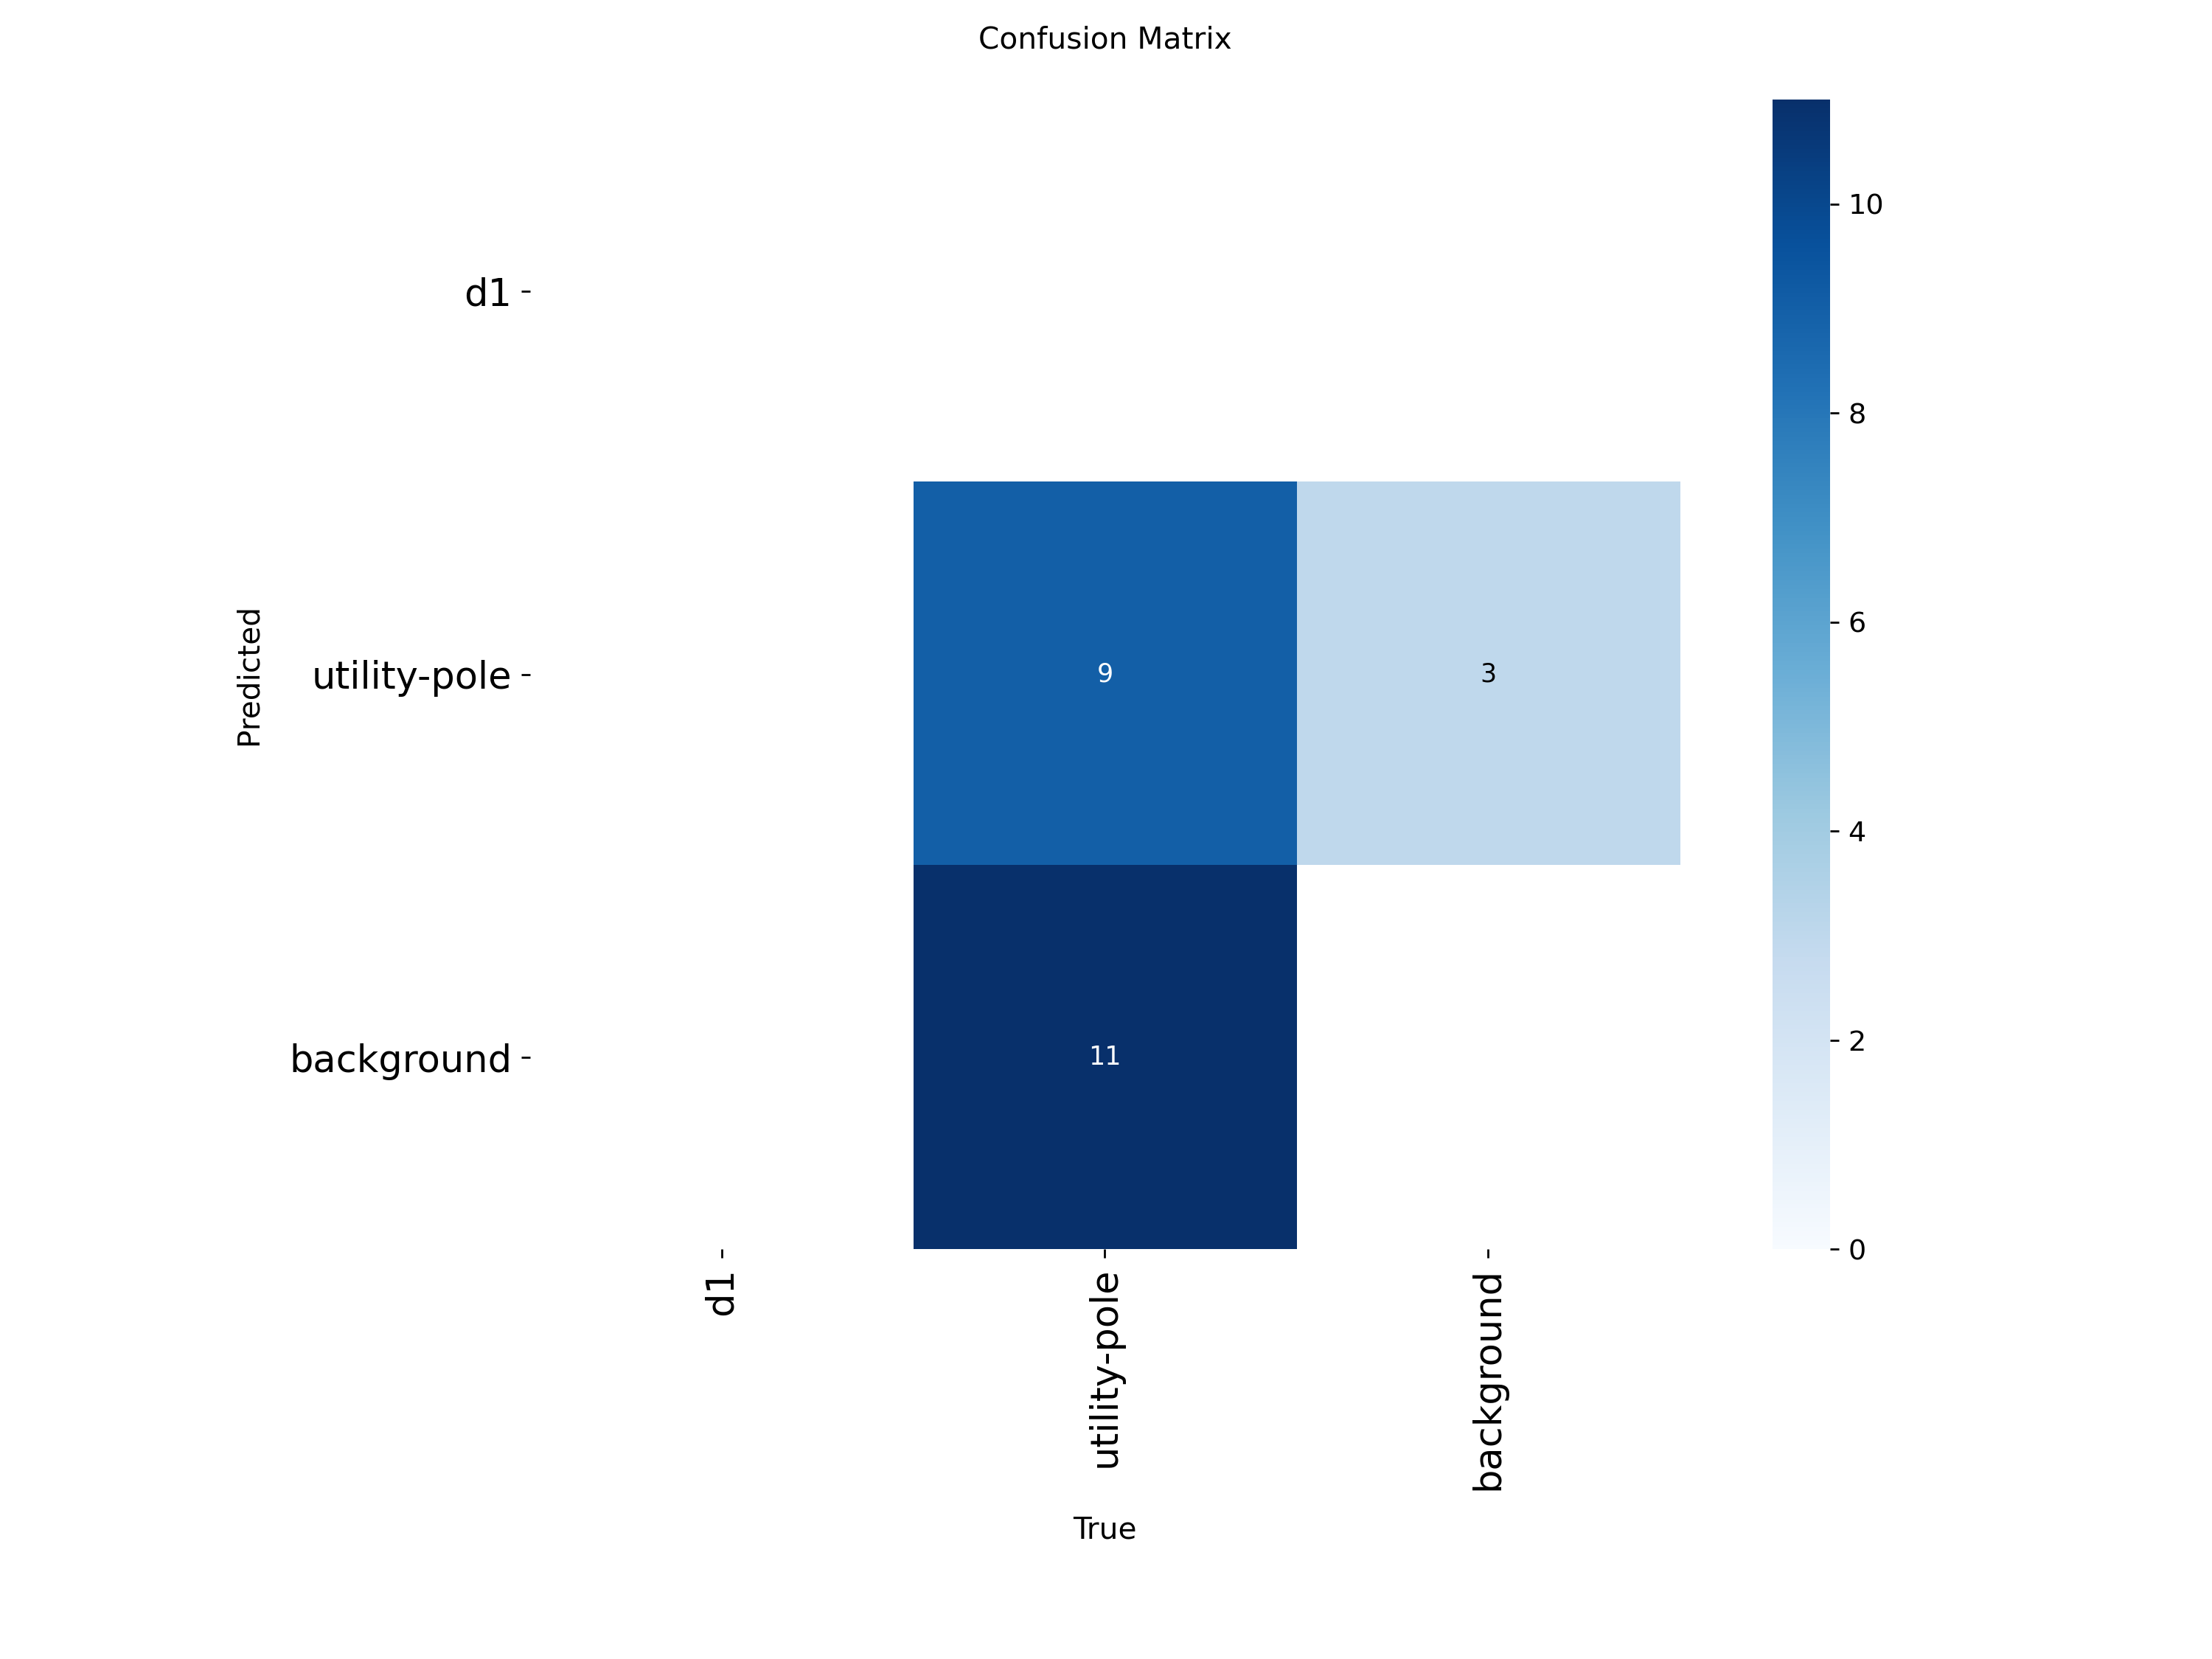

In [4]:
from IPython.display import Image

Image(filename='/content/runs/segment/pole-segmentation-clean/confusion_matrix.png', width=600)


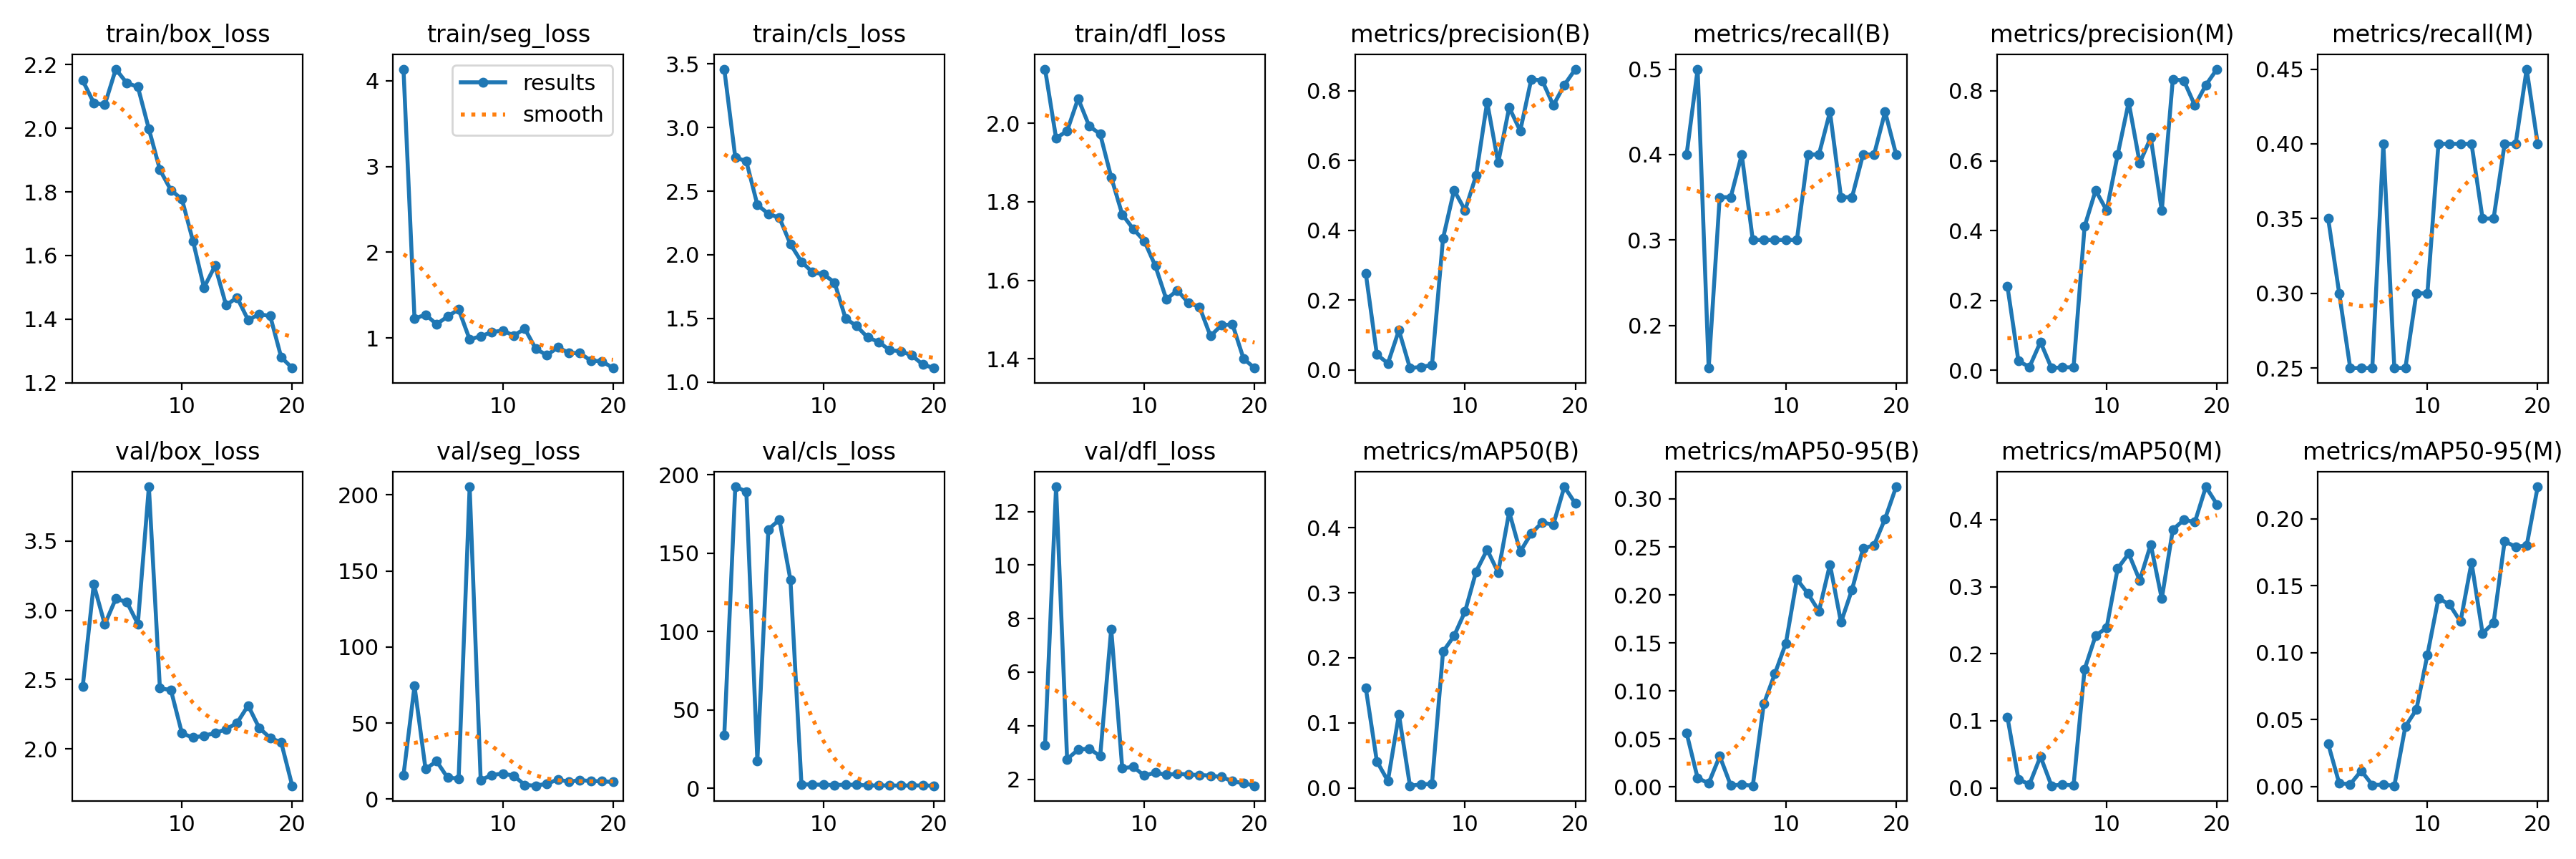

In [6]:
Image(filename=f'/content/runs/segment/pole-segmentation-clean/results.png', width=600)

In [7]:
!yolo task=segment mode=val model=/content/runs/segment/pole-segmentation-clean/weights/best.pt data=/content/Electricpoles-4/data.yaml

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 976.6±367.0 MB/s, size: 26.5 KB)
val: Scanning /content/Electricpoles-4/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.62it/s]
                   all          7         20      0.863     

In [10]:
!yolo task = segment mode = predict model = /content/runs/segment/pole-segmentation-clean/weights/best.pt conf = 0.1 source = /content/Electricpoles-4/test/images

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs

image 1/28 /content/Electricpoles-4/test/images/2djqe7gs6x221_jpg.rf.ce8f246dc5cd0eb4d9ca91250077dff1.jpg: 640x640 1 utility-pole, 45.6ms
image 2/28 /content/Electricpoles-4/test/images/774-utilitypoles-rural_jpg.rf.6070d1f4a63e11ec155bc2de940afebc.jpg: 640x640 5 utility-poles, 42.9ms
image 3/28 /content/Electricpoles-4/test/images/774-utilitypoles-rural_jpg.rf.ad33c7aa5727048fadf8743ec20bb2a6.jpg: 640x640 4 utility-poles, 42.8ms
image 4/28 /content/Electricpoles-4/test/images/Cisco_Rural_Broadband-1200x640_jpg.rf.773e383cc26bb210fa80df2a57c2d195.jpg: 640x640 4 utility-poles, 36.5ms
image 5/28 /content/Electricpoles-4/test/images/Inter-Mnt1_jpg.rf.a8609a3484df485f26add672ba17a0d8.jpg: 640x640 1 utility-pole, 34.5ms
image 6/28 /content/Electricpoles-4/test/images/LWS-windfarmTrans_jpg.rf.26e7a0ad56f917f1fb1c4aec3caa

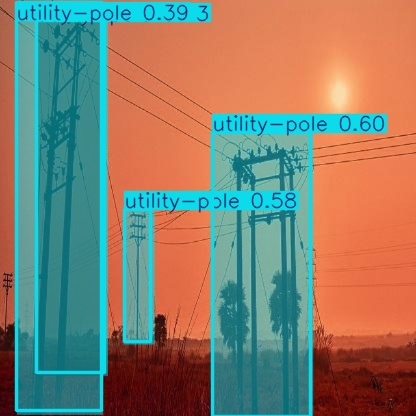

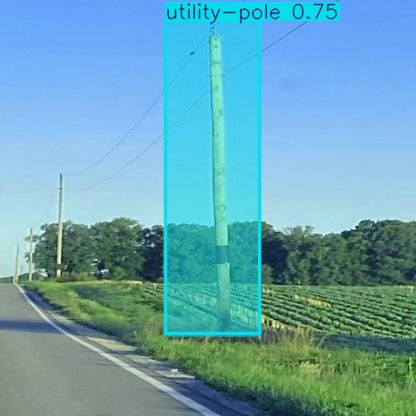

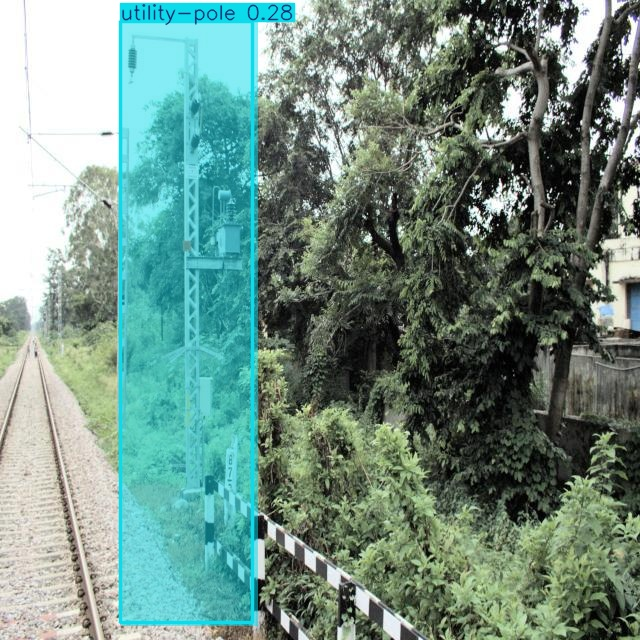

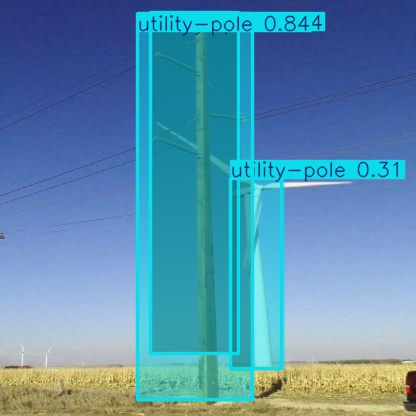

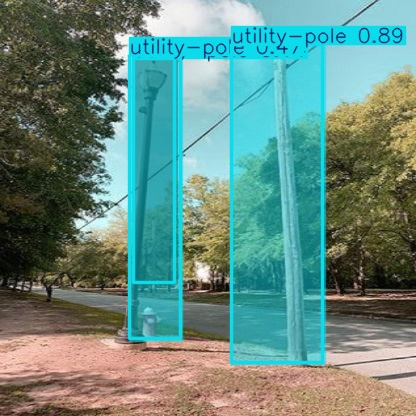

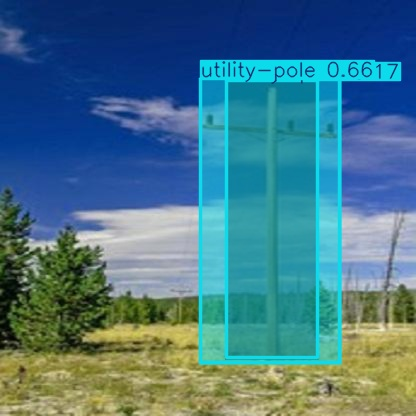

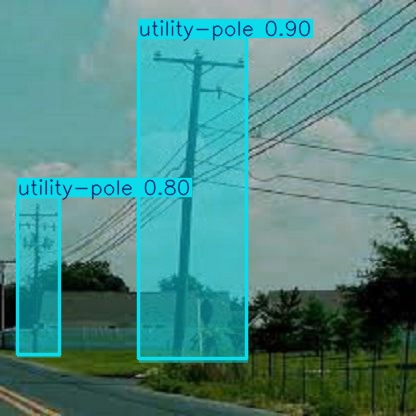

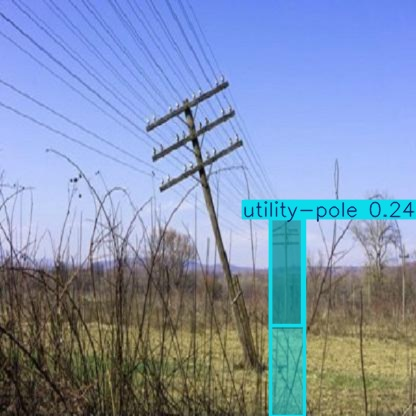

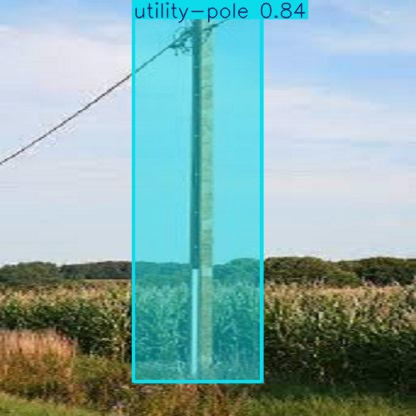

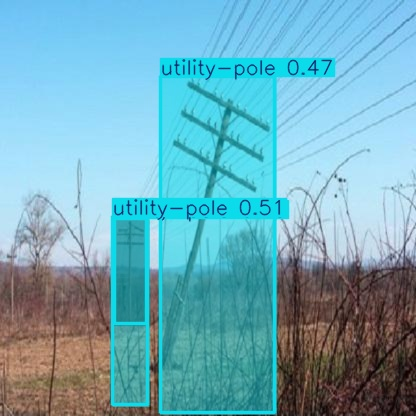

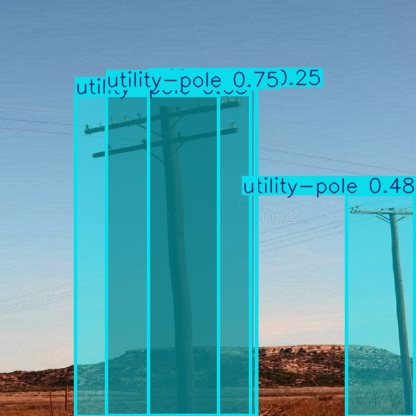

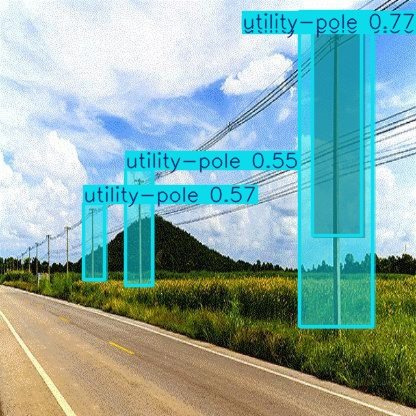

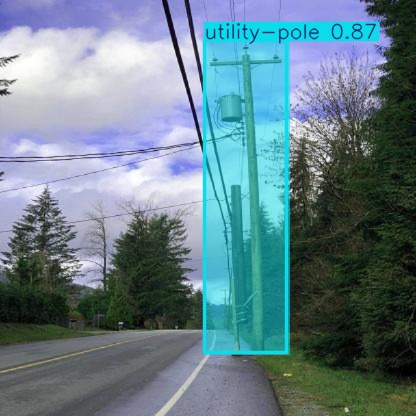

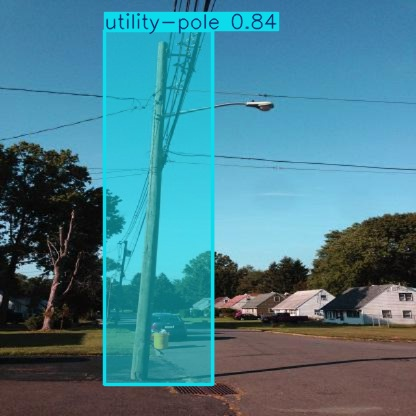

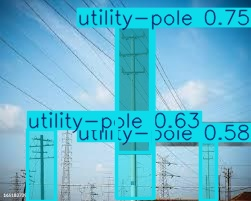

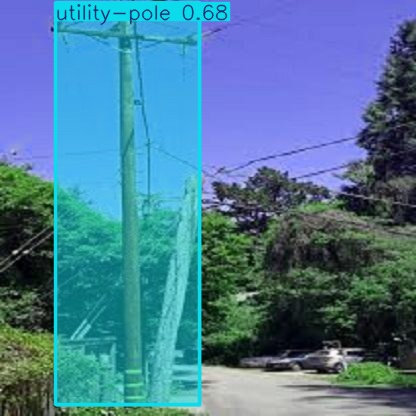

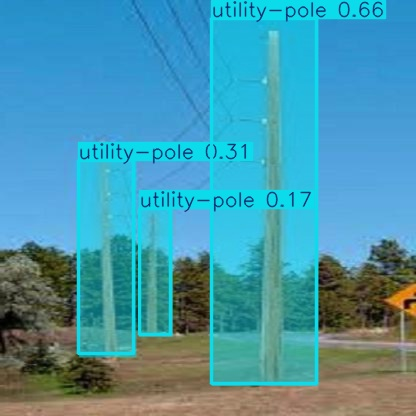

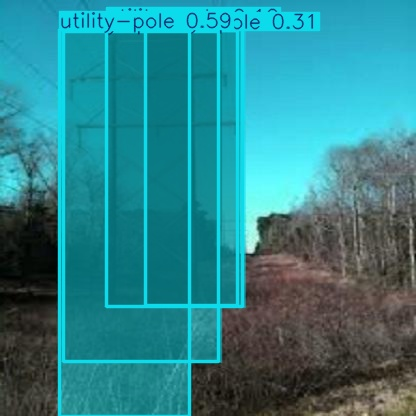

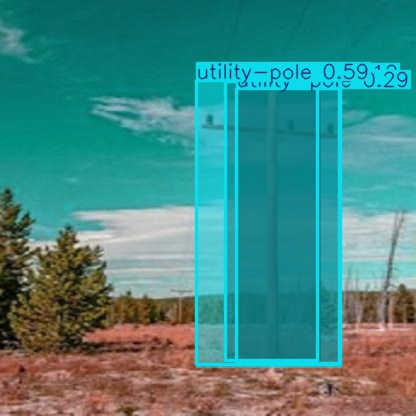

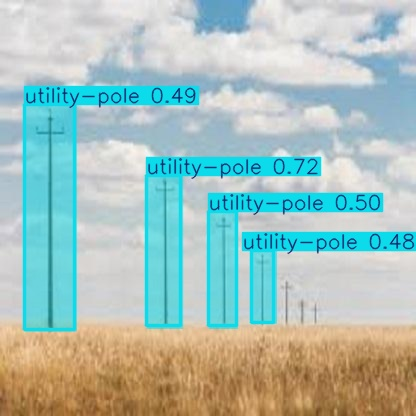

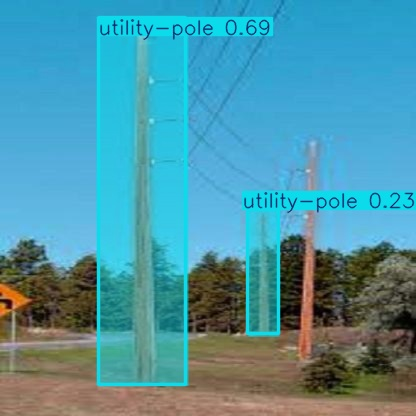

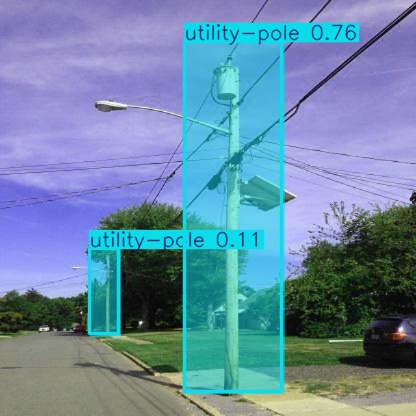

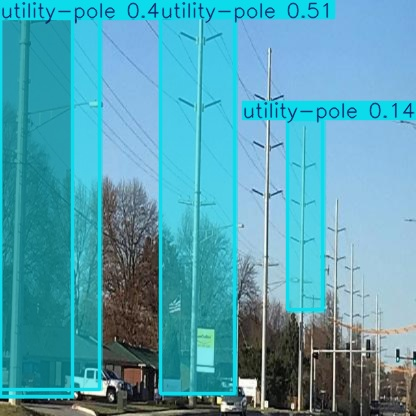

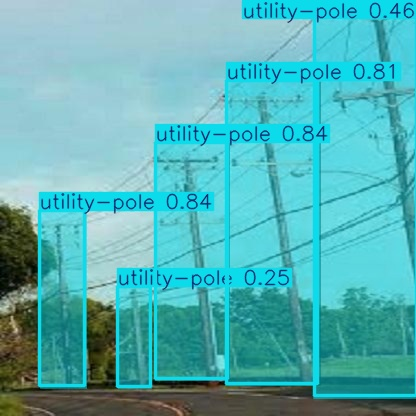

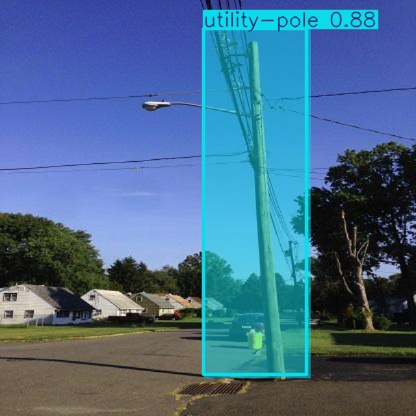

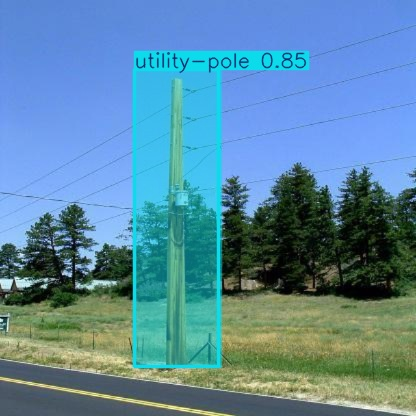

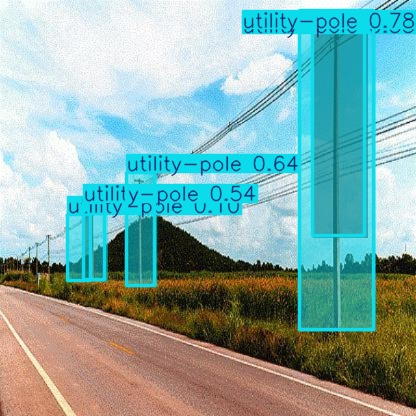

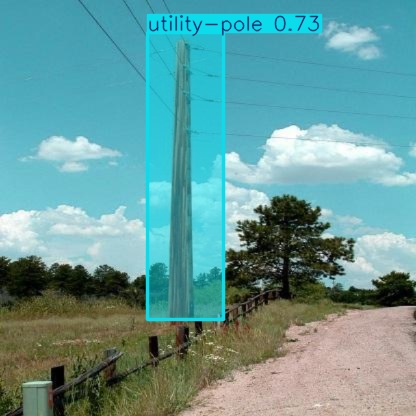

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [12]:
# Install Ultralytics (YOLOv8)
!pip install -q ultralytics opencv-python matplotlib


In [13]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/runs/segment/pole-segmentation-clean/weights/best.pt')


In [14]:
# Image path
img_path = '/content/Electricpoles-4/test/images/falling-electric-pole-field-dried-260nw-1332717614_jpg.rf.92a3b0bf41dcb913a1fc0def3dcf06e8.jpg'  # Replace with actual full filename

# Predict
results = model(img_path, save=True, conf=0.25)



image 1/1 /content/Electricpoles-4/test/images/falling-electric-pole-field-dried-260nw-1332717614_jpg.rf.92a3b0bf41dcb913a1fc0def3dcf06e8.jpg: 640x640 2 utility-poles, 45.2ms
Speed: 5.4ms preprocess, 45.2ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


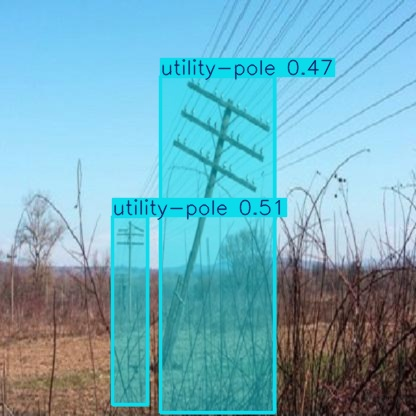

In [15]:
from IPython.display import Image, display
import os

# Find the saved image and display
result_img = os.path.join(model.predictor.save_dir, os.path.basename(img_path))
display(Image(filename=result_img))


In [16]:
import math

for r in results:
    for box in r.boxes.xyxy:
        x1, y1, x2, y2 = box.tolist()
        dx = x2 - x1
        dy = y2 - y1
        angle_rad = math.atan2(dy, dx)
        angle_deg = math.degrees(angle_rad)
        print(f"Estimated angle: {angle_deg:.2f} degrees")


Estimated angle: 79.35 degrees
Estimated angle: 71.24 degrees



image 1/1 /content/Electricpoles-4/test/images/falling-electric-pole-field-dried-260nw-1332717614_jpg.rf.92a3b0bf41dcb913a1fc0def3dcf06e8.jpg: 640x640 3 utility-poles, 45.8ms
Speed: 3.4ms preprocess, 45.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


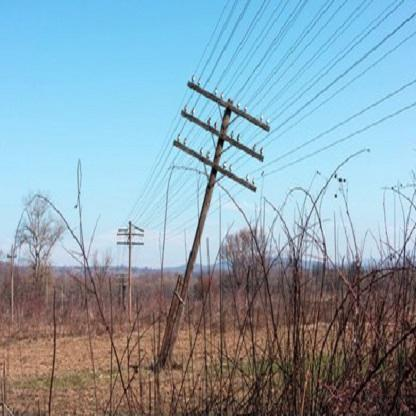

In [17]:
results = model("/content/Electricpoles-4/test/images/falling-electric-pole-field-dried-260nw-1332717614_jpg.rf.92a3b0bf41dcb913a1fc0def3dcf06e8.jpg", conf=0.1, save=True)

from IPython.display import Image, display
display(Image(filename='/content/Electricpoles-4/test/images/falling-electric-pole-field-dried-260nw-1332717614_jpg.rf.92a3b0bf41dcb913a1fc0def3dcf06e8.jpg'))